## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING THE DATA

In [2]:
bank=pd.read_csv(r"C:\Users\asus\Downloads\bank_marketing_updated_v1.csv",low_memory=False,skiprows=2)

In [3]:
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [5]:
# Calculate the mean of each numeric column
mean_values = bank.mean()

# Calculate the median of each numeric column
median_values = bank.median()

# Calculate the standard deviation of each numeric column
std_dev_values = bank.std()

# Print the calculated values
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nStandard Deviation values:")
print(std_dev_values)

Mean values:
customerid    22606.000000
age              40.935651
salary        57006.171065
balance        1362.272058
day              15.806419
campaign          2.763841
pdays            40.197828
previous          0.580323
dtype: float64

Median values:
customerid    22606.0
age              39.0
salary        60000.0
balance         448.0
day              16.0
campaign          2.0
pdays            -1.0
previous          0.0
dtype: float64

Standard Deviation values:
customerid    13051.435847
age              10.619198
salary        32085.718415
balance        3044.765829
day               8.322476
campaign          3.098021
pdays           100.128746
previous          2.303441
dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_18460\1356428787.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = bank.mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_18460\1356428787.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = bank.median()
C:\Users\asus\AppData\Local\Temp\ipykernel_18460\1356428787.py:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. S

In [5]:
bank['duration'].apply(lambda x:x.split()[1]).value_counts()

min    31096
sec    14115
Name: duration, dtype: int64

In [6]:
# as most of the data is in minutes, all the duration to be converted to minutes 
bank['duration'][bank['duration'].apply(lambda x:x.split()[1]=='sec')]=bank['duration'][bank['duration'].apply(lambda x:x.split()[1]=='sec')].apply(lambda x:float(x.split()[0])/60)

C:\Users\asus\AppData\Local\Temp\ipykernel_19956\1763163732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['duration'][bank['duration'].apply(lambda x:x.split()[1]=='sec')]=bank['duration'][bank['duration'].apply(lambda x:x.split()[1]=='sec')].apply(lambda x:float(x.split()[0])/60)


In [7]:
def min_strip(x):
    try:
        if x.split()[1]=='min':
            return float(x.split()[0])
    except:
        return x

In [8]:
bank['duration']=bank['duration'].apply(min_strip)

In [9]:
bank['duration'].dtype

dtype('float64')

In [10]:
bank.drop('customerid',axis=1,inplace=True)

In [11]:
categorical_columns = bank.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['marital', 'jobedu', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'response'],
      dtype='object')


In [12]:
bank['job']=bank['jobedu'].apply(lambda x:x.split(',')[0])

In [13]:
bank['education']=bank['jobedu'].apply(lambda x:x.split(',')[1])

In [14]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
bank.drop('jobedu',axis=1,inplace=True)

In [17]:
bank['month'][~bank['month'].isnull()].apply(lambda x:x.split(',')[1]).value_counts()

 2017    45161
Name: month, dtype: int64

In [18]:
bank['month'][~bank['month'].isnull()]=bank['month'][~bank['month'].isnull()].apply(lambda x:x.split(',')[0])

C:\Users\asus\AppData\Local\Temp\ipykernel_19956\2024599308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['month'][~bank['month'].isnull()]=bank['month'][~bank['month'].isnull()].apply(lambda x:x.split(',')[0])


In [19]:
bank['month'].value_counts()

may    13747
jul     6888
aug     6240
jun     5335
nov     3968
apr     2931
feb     2646
jan     1402
oct      738
sep      576
mar      476
dec      214
Name: month, dtype: int64

In [20]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [21]:
bank['pdays'][bank['pdays']==-1]=bank['pdays'][bank['pdays']==-1]=np.nan

C:\Users\asus\AppData\Local\Temp\ipykernel_19956\157116109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['pdays'][bank['pdays']==-1]=bank['pdays'][bank['pdays']==-1]=np.nan


In [22]:
bank['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [23]:
bank.isnull().sum()

age             20
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month           50
duration         0
campaign         0
pdays        36954
previous         0
poutcome         0
response        30
job              0
education        0
dtype: int64

In [24]:
bank['age'].fillna(bank['age'].mean(),inplace=True)

In [25]:
bank=bank[~bank['response'].isnull()]

In [26]:
bank['month'].fillna('may')

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45181, dtype: object

In [27]:
bank['month'][bank['month'].isnull()]=bank['month'].mode()

In [28]:
bank.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month           50
duration         0
campaign         0
pdays        36930
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

In [29]:
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,8251.000000,45181.000000
mean,40.935763,57005.046369,1362.689936,15.807153,4.302462,2.763352,224.596170,0.580355
std,10.616439,32089.163369,3045.584521,8.322919,4.292520,3.096578,115.352191,2.303987
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.716667,1.000000,133.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,3.000000,2.000000,195.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,5.316667,3.000000,327.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,81.966667,63.000000,871.000000,275.000000


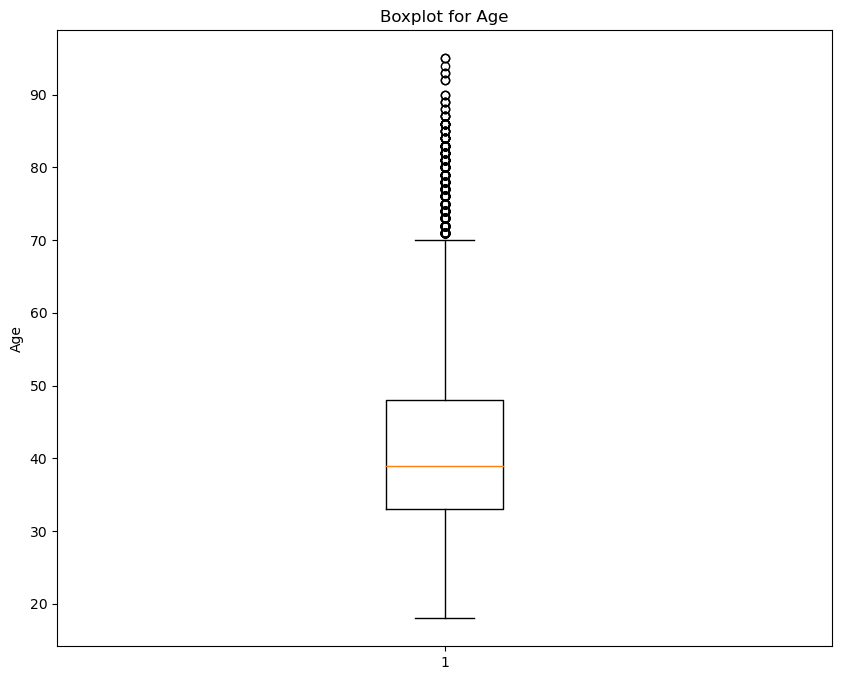

In [30]:
plt.figure(figsize=(10, 8))
plt.boxplot(bank['age'])
plt.title('Boxplot for Age')
plt.ylabel('Age')
plt.show()


In [31]:
cont=bank.select_dtypes(include=np.number)

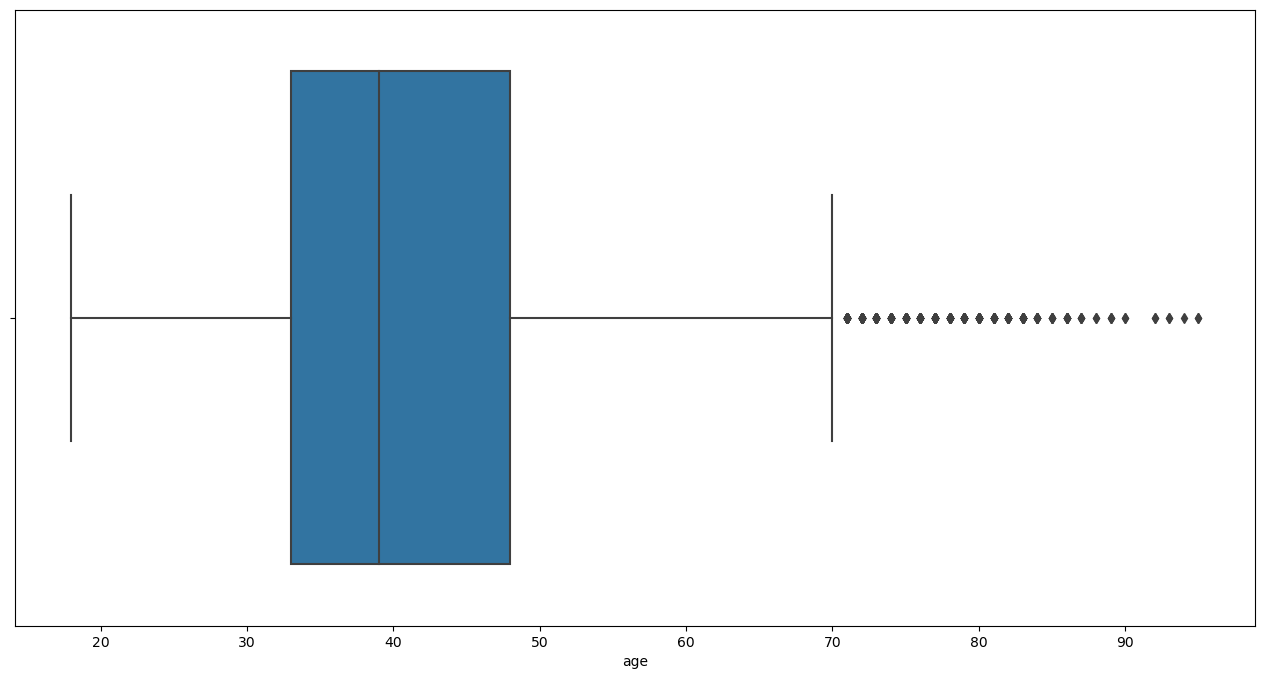

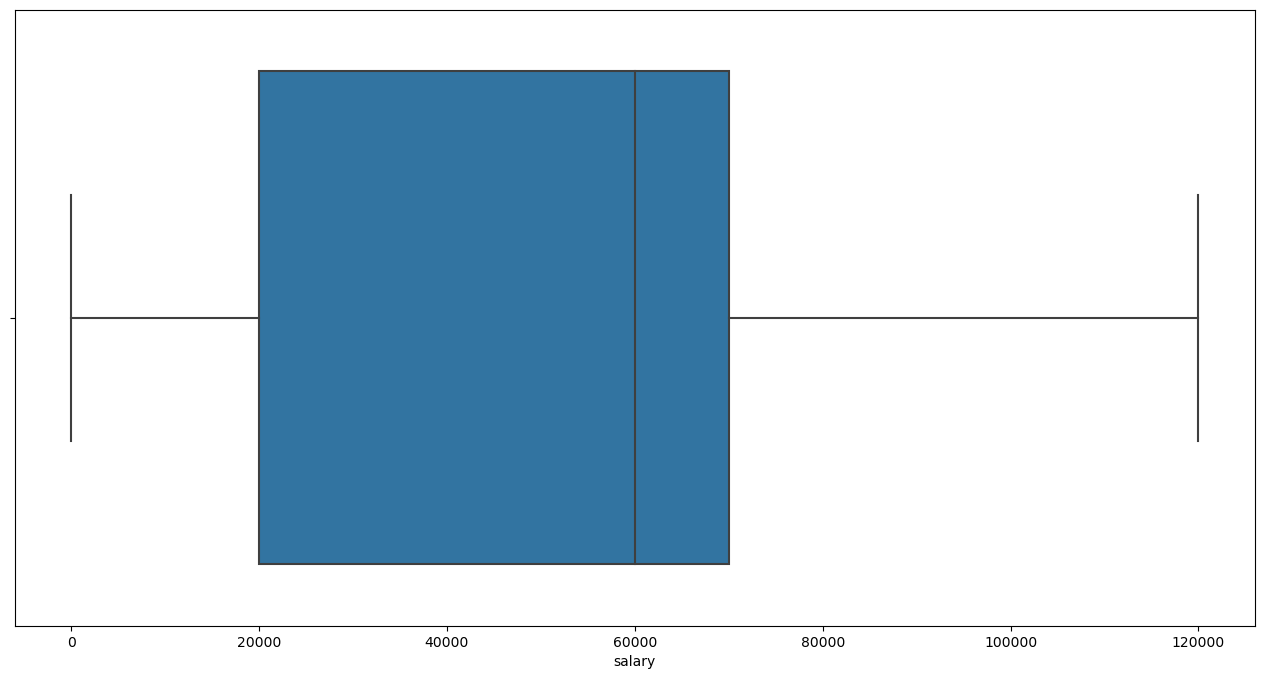

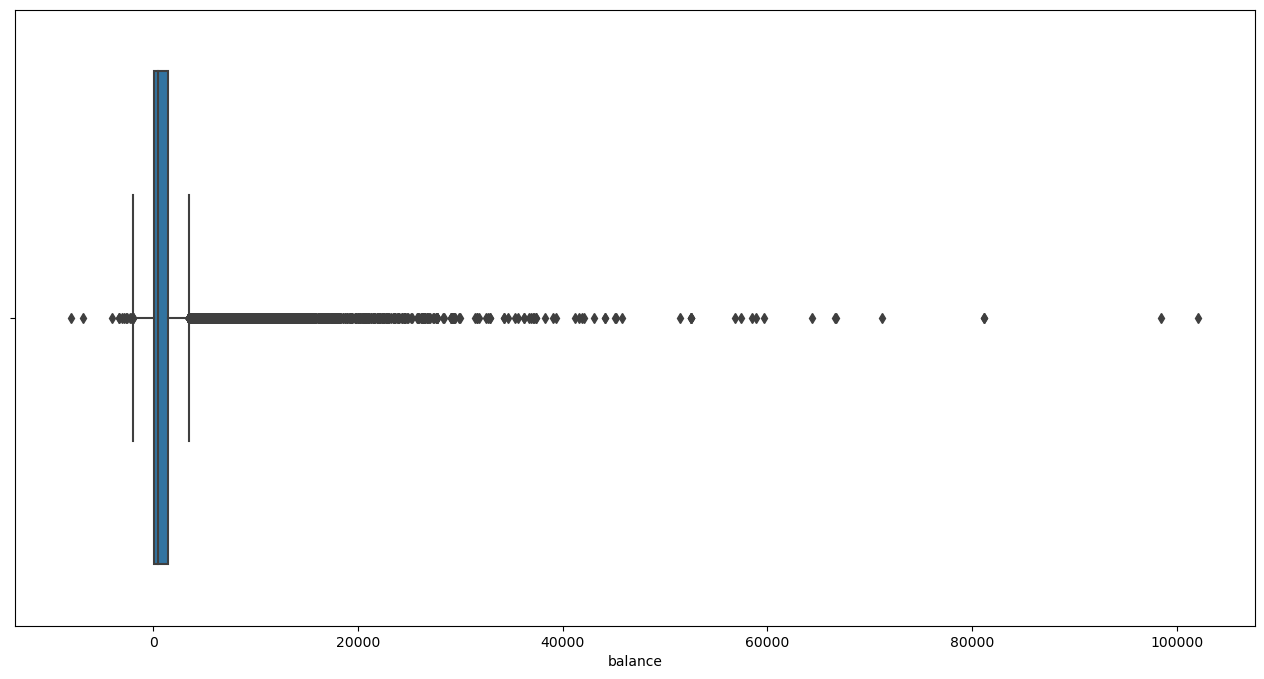

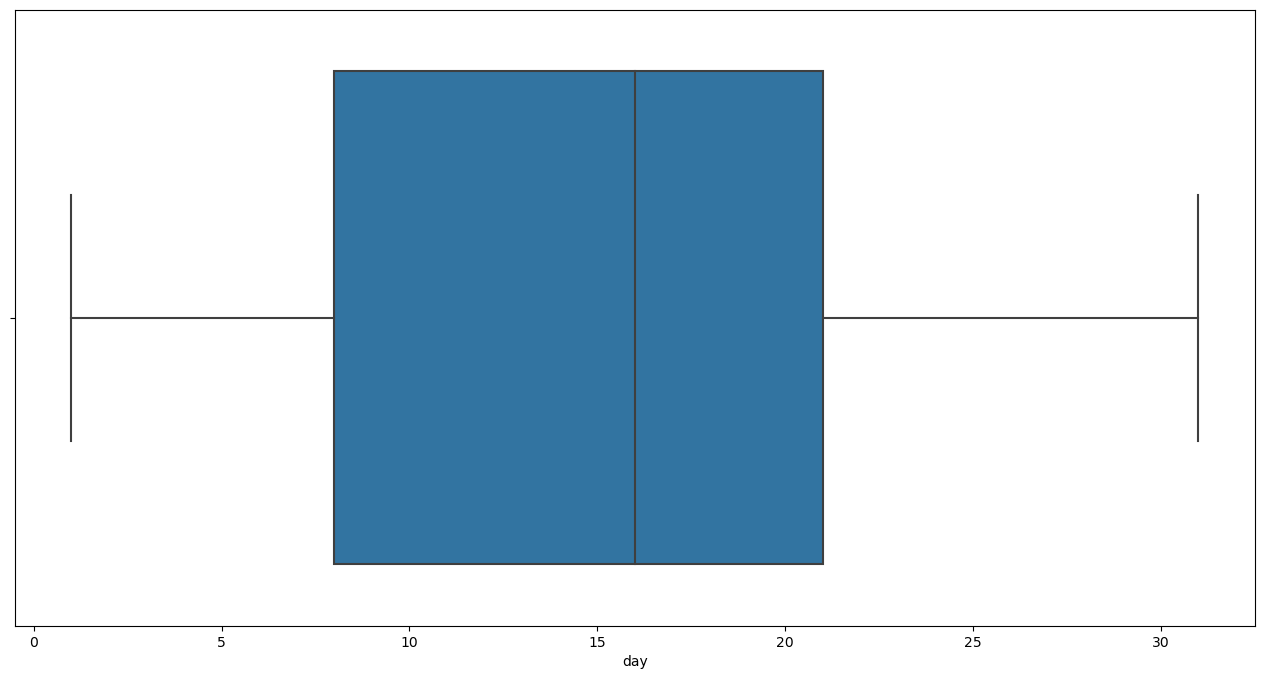

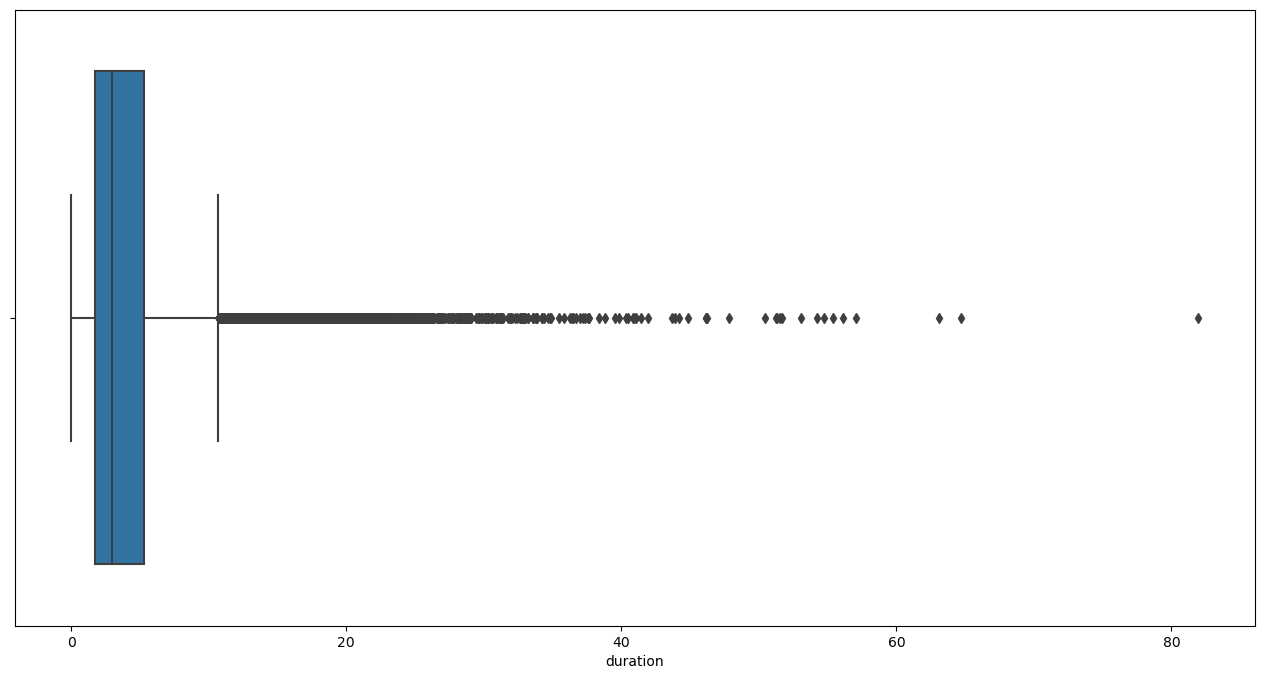

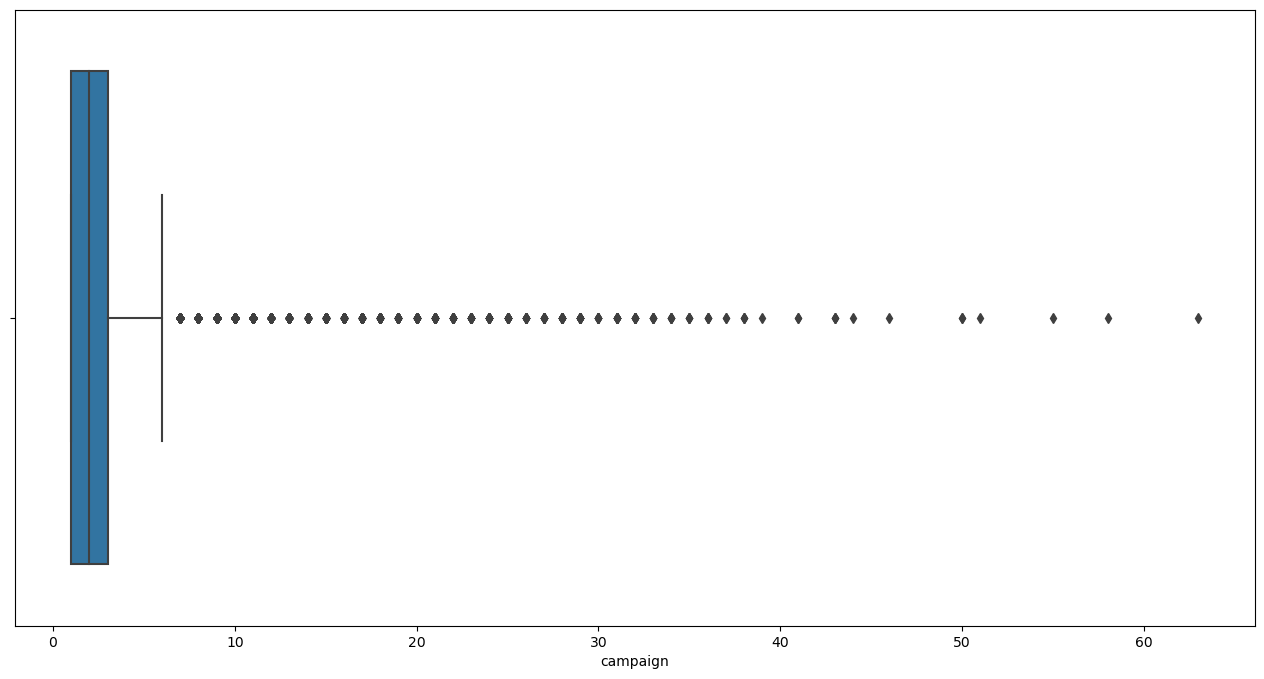

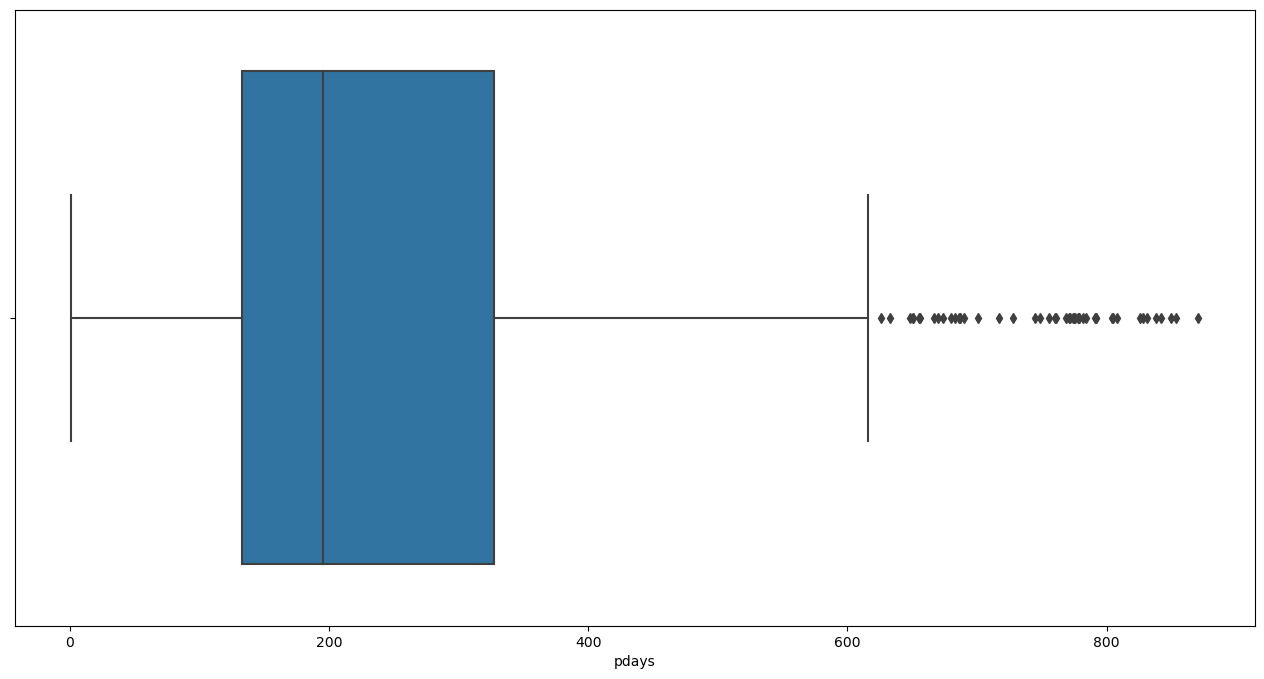

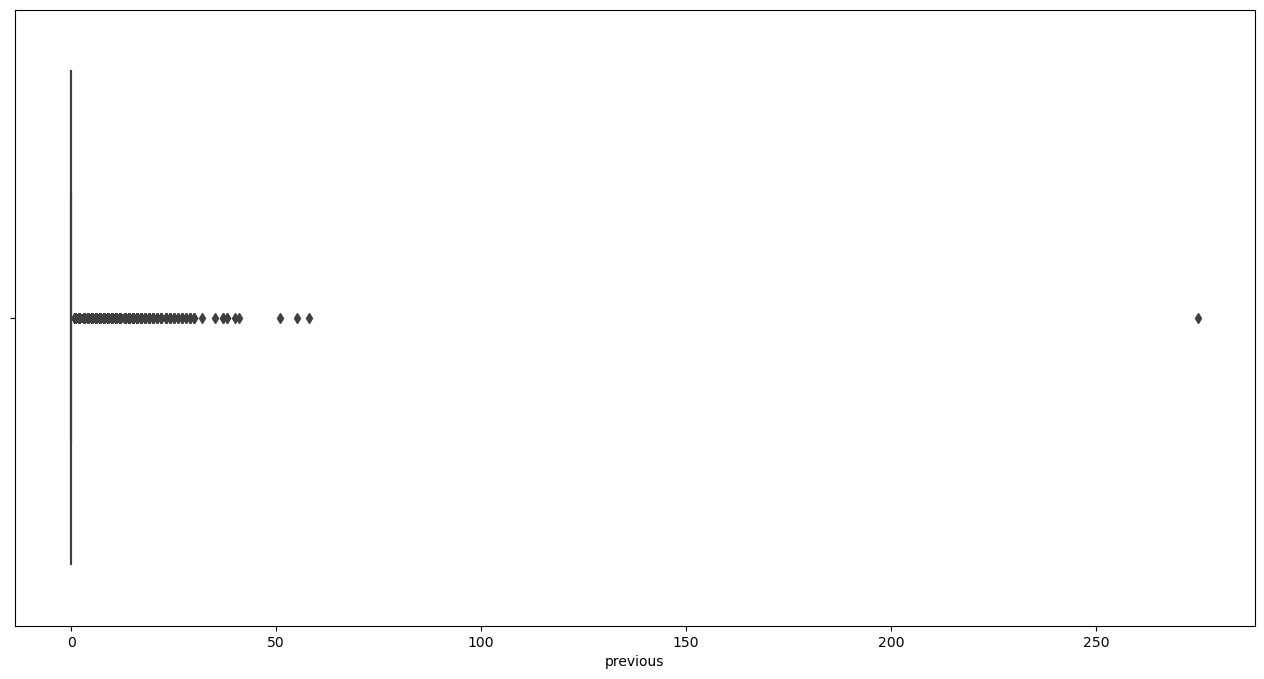

In [32]:
for i in cont:
    plt.figure(figsize=(16,8))
    sns.boxplot(x=i,data=cont)
    plt.show()

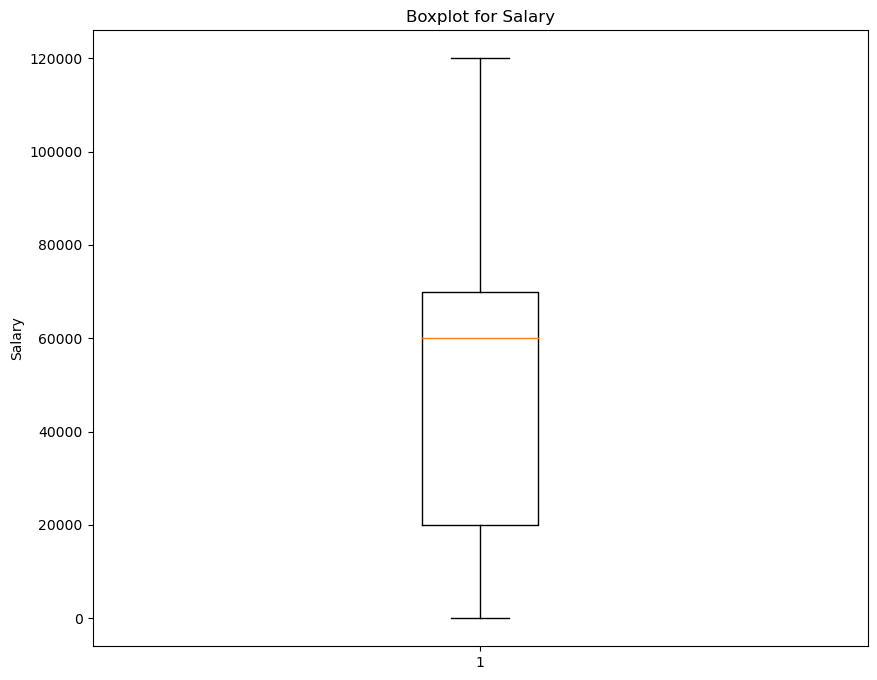

In [33]:
plt.figure(figsize=(10, 8))
plt.boxplot(bank['salary'])
plt.title('Boxplot for Salary')
plt.ylabel('Salary')
plt.show()


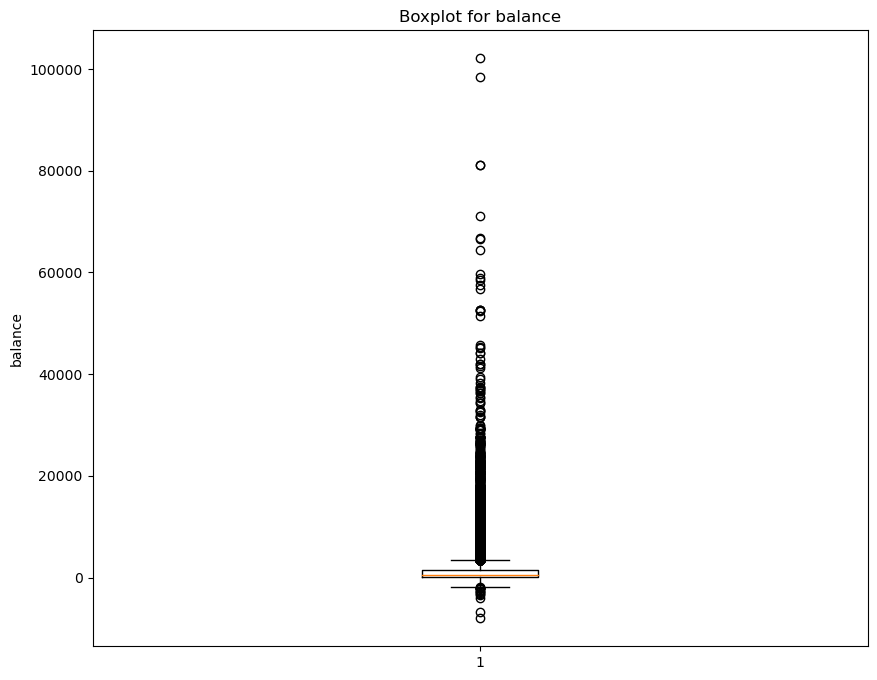

In [34]:
plt.figure(figsize=(10, 8))
plt.boxplot(bank['balance'])
plt.title('Boxplot for balance')
plt.ylabel('balance')
plt.show()

In [35]:
bank[bank['balance']>14000].describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,65.000000,392.000000
mean,45.081633,69278.061224,23264.767857,16.176020,4.286012,2.760204,187.261538,0.515306
std,12.130091,33905.264864,11866.261899,8.068894,4.113635,3.070135,116.471466,1.707444
min,23.000000,0.000000,14004.000000,1.000000,0.016667,1.000000,31.000000,0.000000
25%,34.000000,50000.000000,16430.000000,9.750000,1.662500,1.000000,97.000000,0.000000
50%,44.000000,60000.000000,19841.500000,18.000000,2.941667,2.000000,168.000000,0.000000
75%,55.000000,100000.000000,24802.500000,21.000000,5.304167,3.000000,245.000000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,27.050000,31.000000,589.000000,23.000000


In [36]:
bank.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,may,3.300000,1,NaN,0,unknown,no,unknown,unknown


In [37]:
bank['marital'].value_counts(normalize=True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

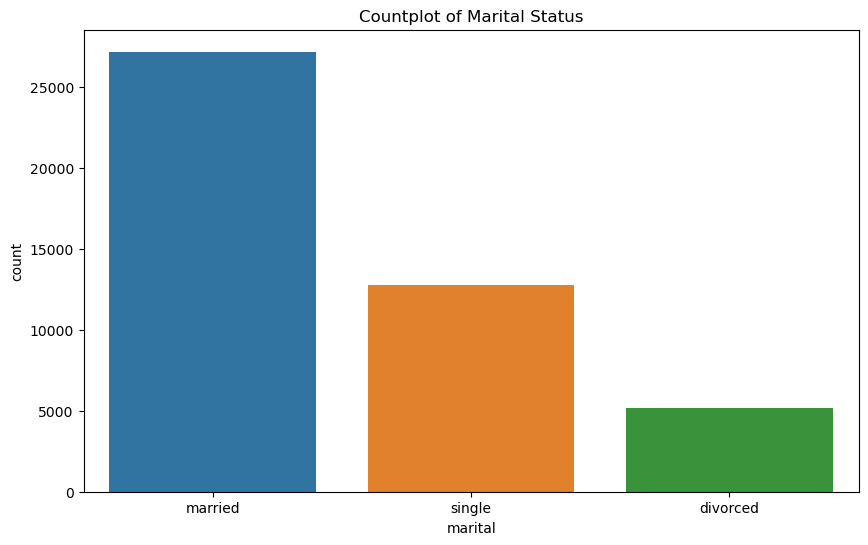

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=bank)
plt.title('Countplot of Marital Status')
plt.show()


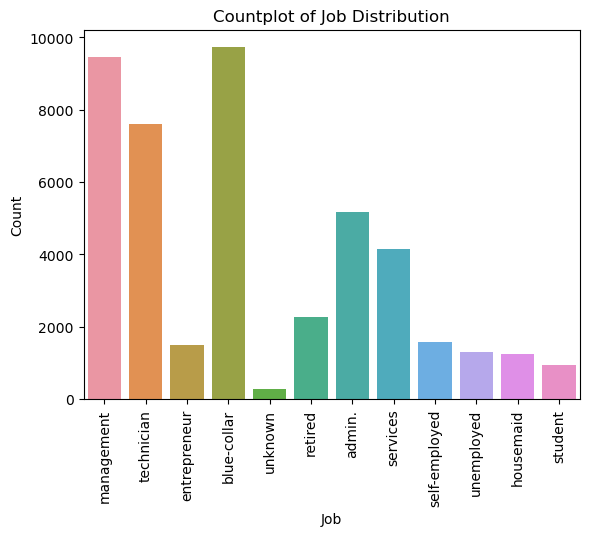

In [39]:
sns.countplot(x='job', data=bank)
plt.xticks(rotation=90)
plt.title('Countplot of Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


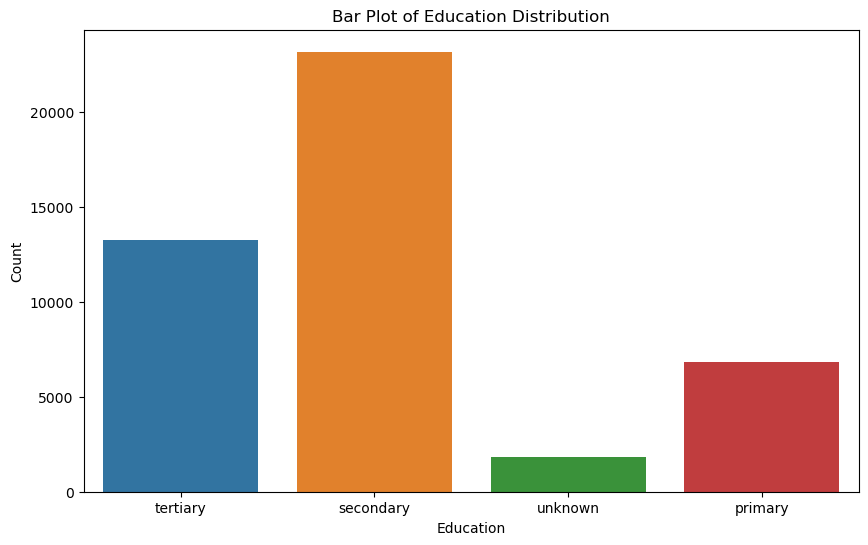

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=bank)
plt.title('Bar Plot of Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


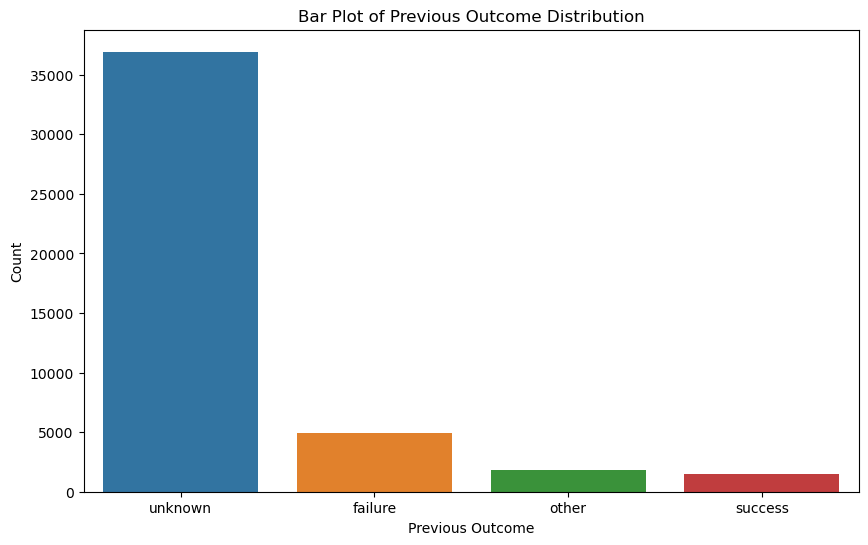

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', data=bank)
plt.title('Bar Plot of Previous Outcome Distribution')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()


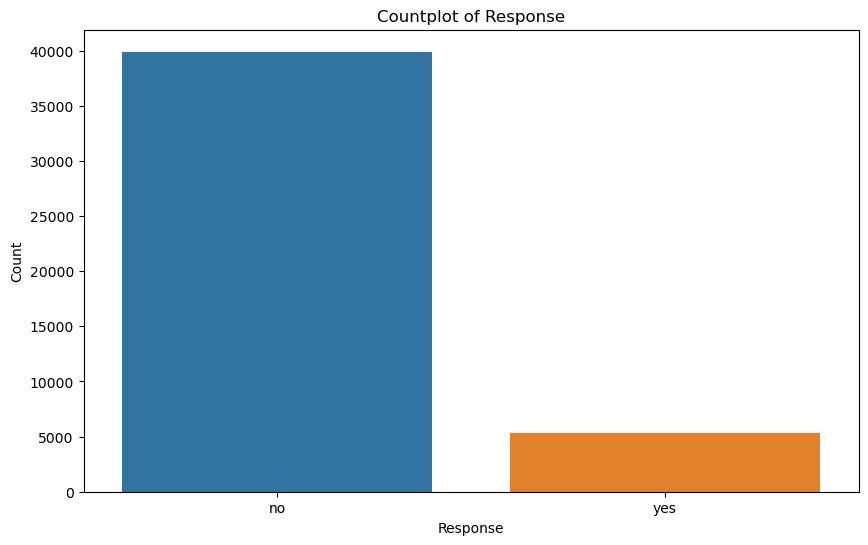

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='response', data=bank)
plt.title('Countplot of Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


# BIVARIENT ANALYSIS

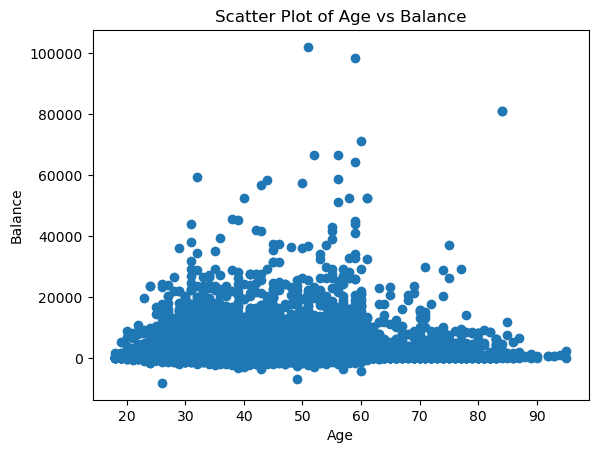

In [43]:
plt.scatter(bank['age'], bank['balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs Balance')
plt.show()


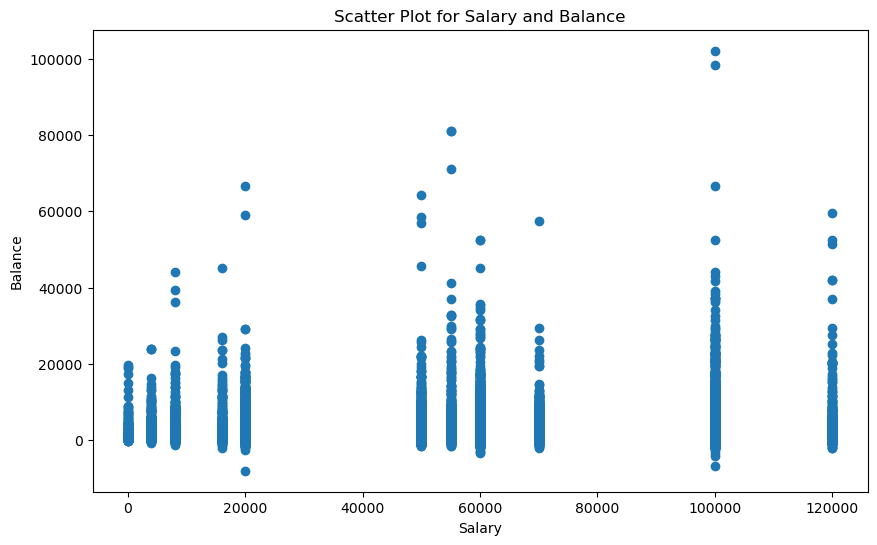

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(bank['salary'], bank['balance'])
plt.title('Scatter Plot for Salary and Balance')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.show()


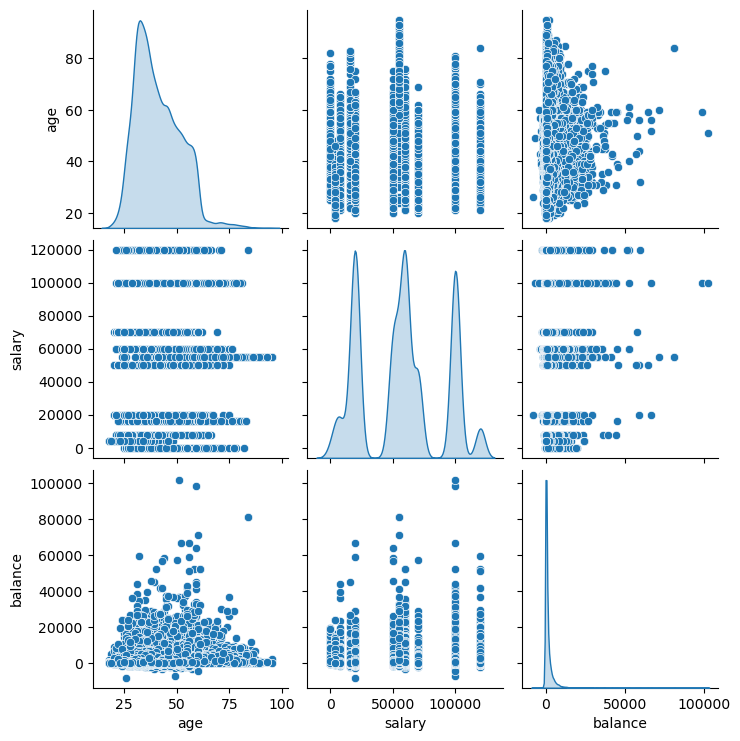

In [45]:
sns.pairplot(bank[['age','salary','balance']],diag_kind='kde')


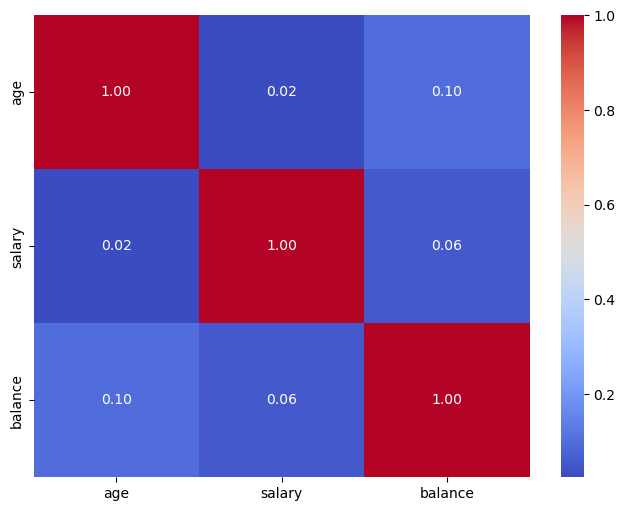

In [46]:
heatmap_data = bank[['age', 'salary', 'balance']]
corr = heatmap_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


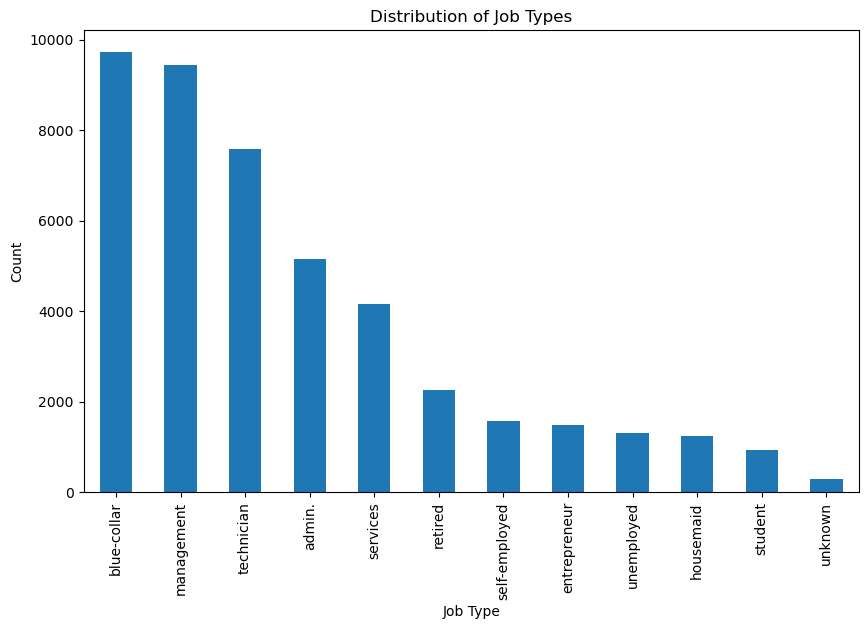

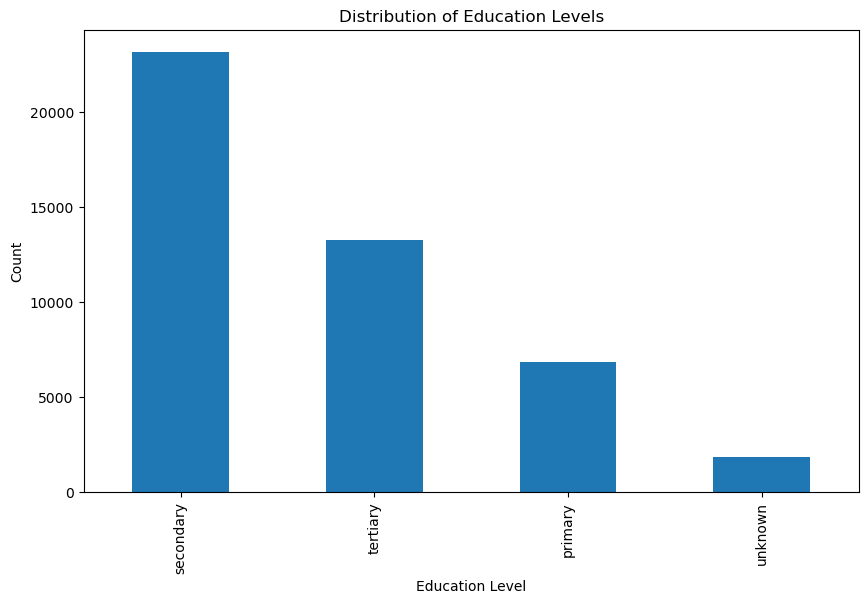

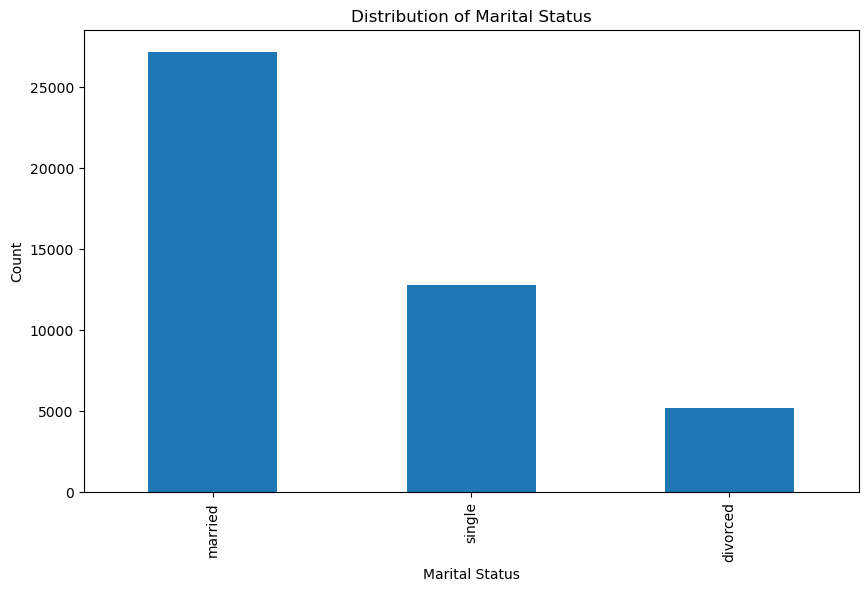

In [47]:
# Investigate the distribution of job type
job_counts = bank['job'].value_counts()
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

# Investigate the distribution of education
education_counts = bank['education'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Investigate the distribution of marital status
marital_counts = bank['marital'].value_counts()
plt.figure(figsize=(10, 6))
marital_counts.plot(kind='bar')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [48]:
# Group 'response' column and calculate mean salary for each response category
response_salary_grouped = bank.groupby('response')['salary'].mean()
print(response_salary_grouped)


response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64


In [49]:
# Group 'response' column and calculate median salary for each response category
response_salary_median = bank.groupby('response')['salary'].median()
print(response_salary_median)


response
no     60000.0
yes    60000.0
Name: salary, dtype: float64


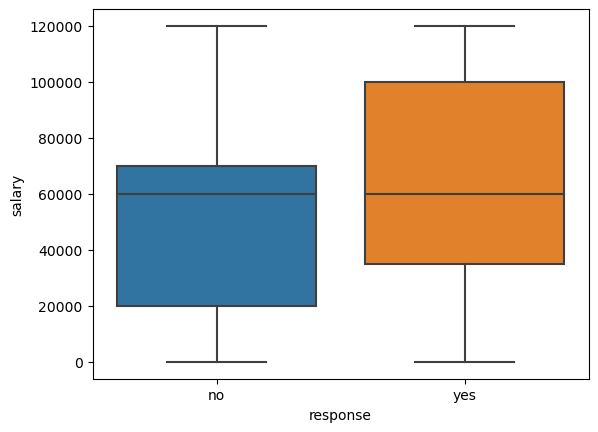

In [50]:
# Plotting a boxplot for 'response' and 'salary'
sns.boxplot(x='response', y='salary', data=bank)
plt.show()


In [51]:
# Assuming 'response' and 'balance' are column names in your 'bank' DataFrame
response_balance_median = bank.groupby('response')['balance'].median()

print(response_balance_median)


response
no     417.0
yes    733.0
Name: balance, dtype: float64


In [52]:
# Group by 'response' and calculate the mean 'balance' for each group
response_balance_mean = bank.groupby('response')['balance'].mean()

print(response_balance_mean)


response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64


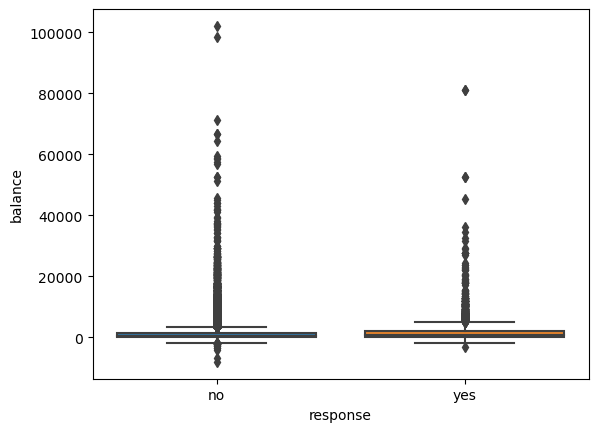

In [53]:
sns.boxplot(x='response', y='balance', data=bank)
plt.show()


In [54]:
bank.groupby('response')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39894.0,1304.094525,2975.033811,-8019.0,58.0,417.0,1345.0,102127.0
yes,5287.0,1804.832041,3501.645424,-3058.0,210.5,733.0,2159.5,81204.0


In [55]:
education_salary_stats = bank.groupby('education')['salary'].agg(['mean', 'median'])
print(education_salary_stats)

                   mean    median
education                        
primary    34220.192870   20000.0
secondary  49739.143559   55000.0
tertiary   82875.564249  100000.0
unknown    46529.633621   50000.0


In [56]:
bank.groupby('education')['response'].value_counts(normalize=True)

education  response
primary    no          0.913647
           yes         0.086353
secondary  no          0.894390
           yes         0.105610
tertiary   no          0.849910
           yes         0.150090
unknown    no          0.864224
           yes         0.135776
Name: response, dtype: float64

In [57]:
bank.groupby('job')['salary'].mean().sort_values(ascending=False)

job
entrepreneur     120000.0
management       100000.0
services          70000.0
self-employed     60000.0
technician        60000.0
retired           55000.0
admin.            50000.0
blue-collar       20000.0
housemaid         16000.0
unemployed         8000.0
student            4000.0
unknown               0.0
Name: salary, dtype: float64

In [58]:
bank['response_alert']=bank['response'].replace({'no':0,'yes':1})


In [59]:
bank.groupby('education')['response_alert'].mean()

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_alert, dtype: float64

Text(0, 0.5, 'response %')

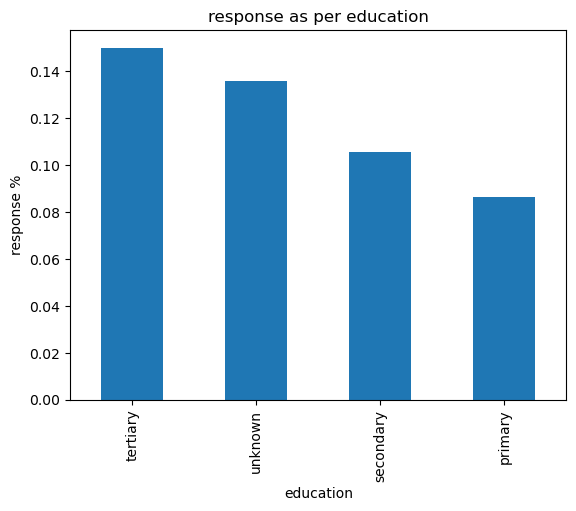

In [60]:
bank.groupby('education')['response_alert'].mean().sort_values(ascending=False).plot.bar() 
plt.title('response as per education') 
plt.ylabel('response %')


In [61]:
bank.groupby('marital')['response_alert'].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_alert, dtype: float64

Text(0, 0.5, 'response %')

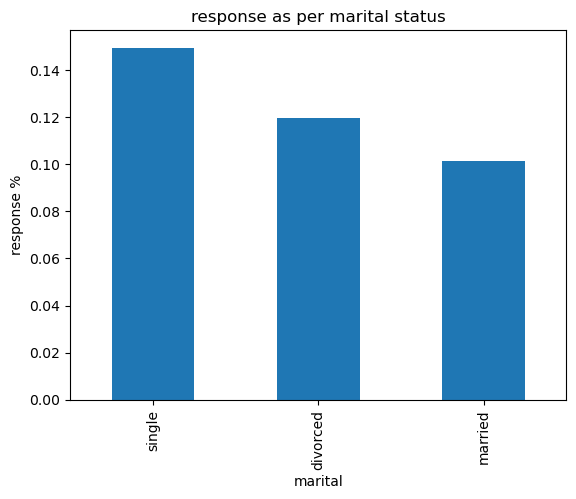

In [62]:
bank.groupby('marital')['response_alert'].mean().sort_values(ascending=False).plot.bar() 
plt.title('response as per marital status') 
plt.ylabel('response %')


In [63]:
bank.groupby('loan')['response_alert'].mean()

loan
no     0.126585
yes    0.066869
Name: response_alert, dtype: float64

Text(0, 0.5, 'response %')

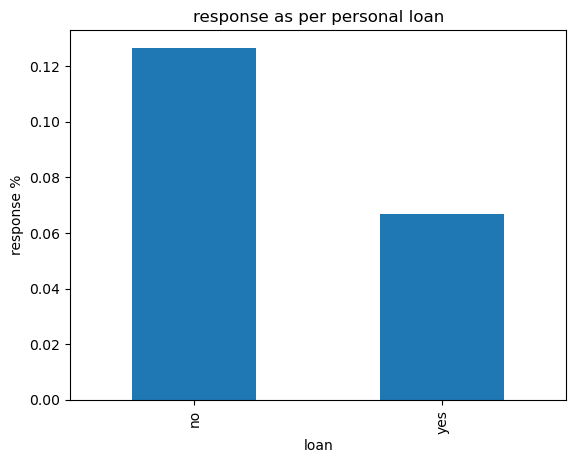

In [64]:
bank.groupby('loan')['response_alert'].mean().sort_values(ascending=False).plot.bar() 
plt.title('response as per personal loan') 
plt.ylabel('response %')



In [65]:
bank.groupby('housing')['response_alert'].mean()

housing
no     0.167074
yes    0.077015
Name: response_alert, dtype: float64

Text(0, 0.5, 'response %')

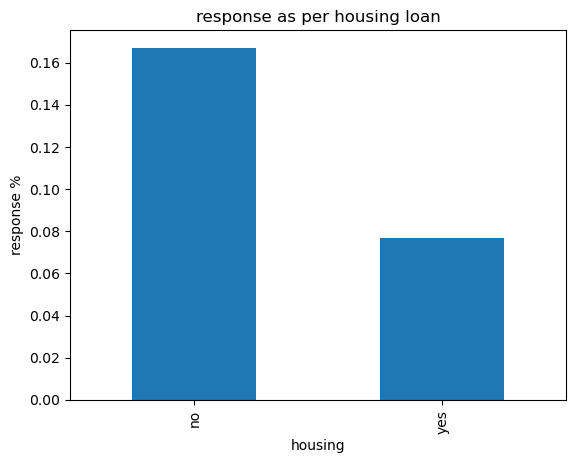

In [66]:
bank.groupby('housing')['response_alert'].mean().sort_values(ascending=False).plot.bar() 
plt.title('response as per housing loan') 
plt.ylabel('response %')

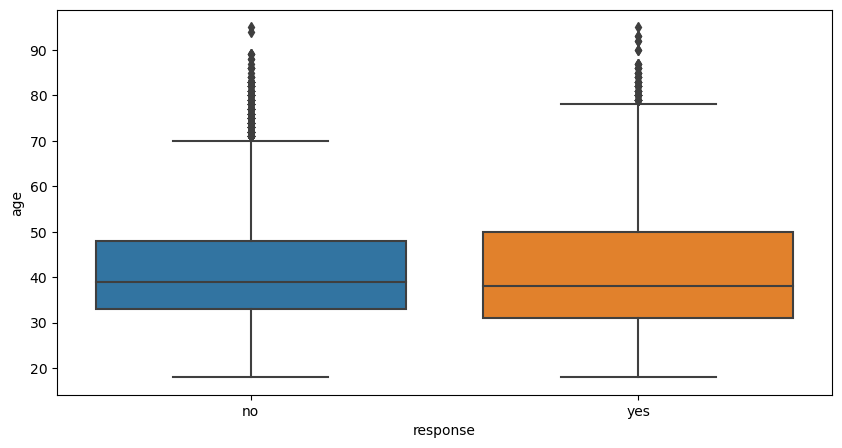

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='response', y='age', data=bank)
plt.show()


In [68]:
bank.groupby(['response'])['age'].mean()

response
no     40.838869
yes    41.666895
Name: age, dtype: float64

In [69]:
bank.groupby(['response'])['age'].median()

response
no     39.0
yes    38.0
Name: age, dtype: float64

In [70]:
bank['age_bracket']=pd.cut(bank['age'],bins=[0,30,40,50,60,70,100],labels=['<30','<40','<50','<60','<70','<100'])

In [71]:
bank.groupby('age_bracket')['response_alert'].mean()

age_bracket
<30     0.162847
<40     0.102537
<50     0.090747
<60     0.100410
<70     0.406295
<100    0.447639
Name: response_alert, dtype: float64

Text(0, 0.5, 'response %')

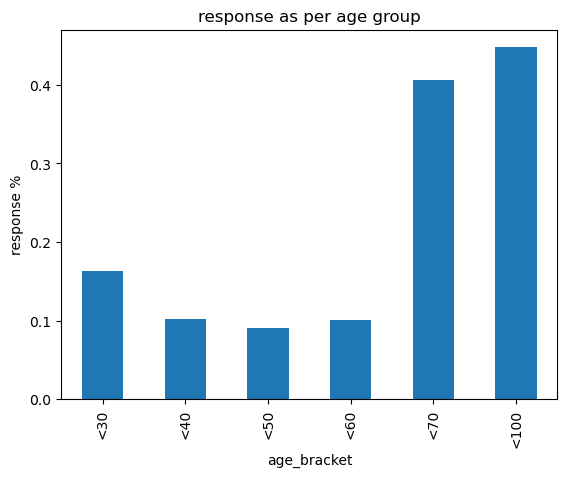

In [72]:
bank.groupby('age_bracket')['response_alert'].mean().plot.bar()
plt.title('response as per age group') 
plt.ylabel('response %')

In [73]:
# Check the 'balance' column to decide the binning strategy
print(bank['balance'].describe())

# Create income categories based on balance quantiles
quantile_list = [0, 0.25, 0.5, 0.75, 1.]
quantile_labels = ['Low', 'Medium', 'High', 'Very High']
bank['income_category'] = pd.qcut(bank['balance'], q=quantile_list, labels=quantile_labels)

# Verify the new column
print(bank['income_category'].head())


count     45181.000000
mean       1362.689936
std        3045.584521
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64
0    Very High
1          Low
2          Low
3    Very High
4          Low
Name: income_category, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


C:\Users\asus\AppData\Local\Temp\ipykernel_19956\1904353381.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income_category', y='balance', data=bank, ci=None)


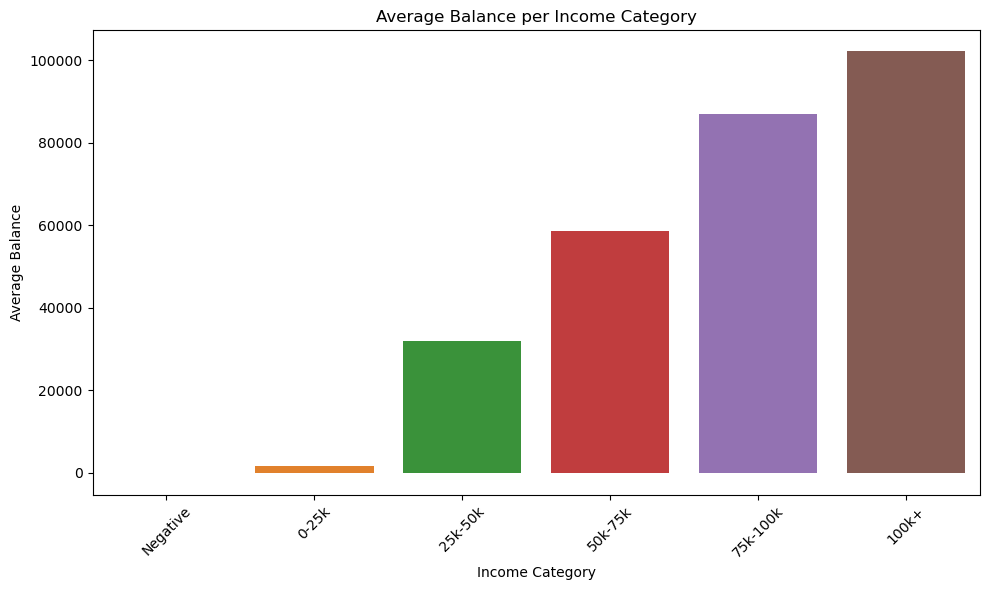

In [74]:
# First, categorize 'balance' into income categories
bank['income_category'] = pd.cut(bank['balance'], bins=[-np.inf, 0, 25000, 50000, 75000, 100000, np.inf], 
                                labels=['Negative', '0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+'])

# Now, plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='income_category', y='balance', data=bank, ci=None)
plt.xlabel('Income Category')
plt.ylabel('Average Balance')
plt.title('Average Balance per Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


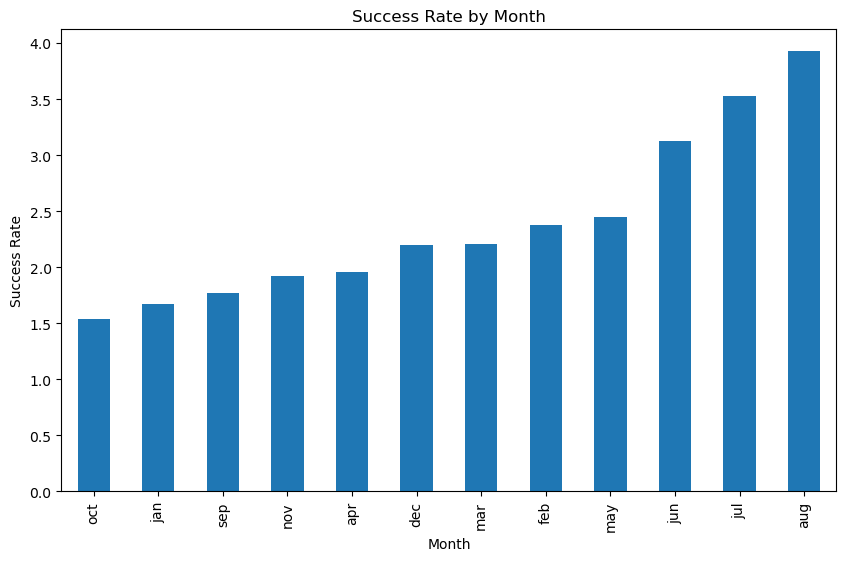

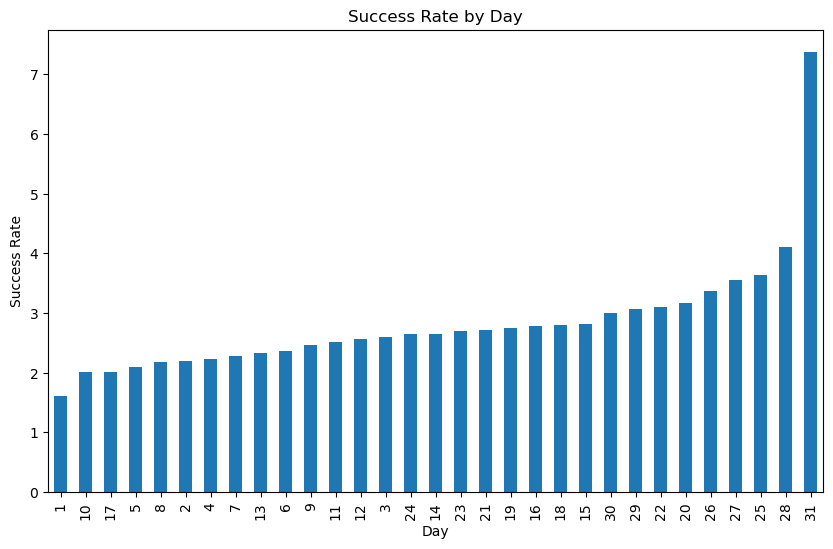

In [75]:
# Analyzing success rate by month
monthly_success = bank.groupby('month')['campaign'].mean().sort_values()

# Visualizing success rate by month
plt.figure(figsize=(10, 6))
monthly_success.plot(kind='bar')
plt.title('Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.show()

# Analyzing success rate by day
daily_success = bank.groupby('day')['campaign'].mean().sort_values()

# Visualizing success rate by day
plt.figure(figsize=(10, 6))
daily_success.plot(kind='bar')
plt.title('Success Rate by Day')
plt.xlabel('Day')
plt.ylabel('Success Rate')
plt.show()


## MULTIVARIENT ANALYSIS


In [76]:
bank.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education',
       'response_alert', 'age_bracket', 'income_category'],
      dtype='object')

In [77]:
corr_matrix=bank[['education','marital','response_alert']].corr(numeric_only=True)
corr_matrix

,response_alert
response_alert,1.0


In [78]:
edu_martial=pd.pivot_table(data=bank,index='education',columns='marital',values='response_alert') 
edu_martial

marital,divorced,married,single
education,,,
primary,0.138482,0.075573,0.106682
secondary,0.103448,0.094681,0.129271
tertiary,0.138001,0.129798,0.183622
unknown,0.142012,0.122519,0.162879


<Axes: xlabel='marital', ylabel='education'>

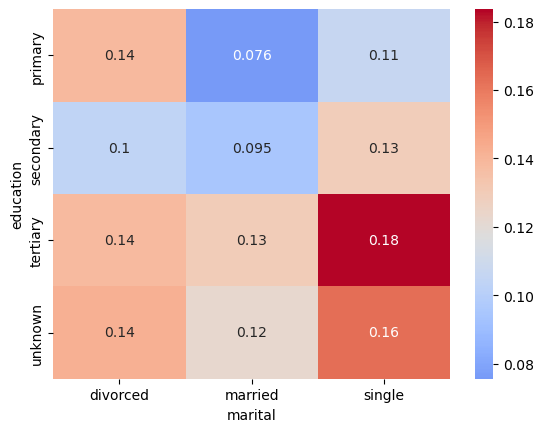

In [79]:
sns.heatmap(edu_martial,annot=True,cmap='coolwarm',center=bank['response_alert'].mean())

In [80]:
bank['response_alert'].mean()

0.11701821562161085

In [81]:
job_maritial=pd.pivot_table(data=bank,index='job',columns='marital',values='response_alert') 
job_maritial

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136074
blue-collar,0.077437,0.062751,0.105760
entrepreneur,0.083799,0.075701,0.113924
housemaid,0.097826,0.073546,0.166667
management,0.127813,0.126205,0.162199
retired,0.285377,0.220682,0.120370
self-employed,0.157143,0.079637,0.191874
services,0.091075,0.074074,0.117696
student,0.166667,0.185185,0.293850


<Axes: xlabel='marital', ylabel='job'>

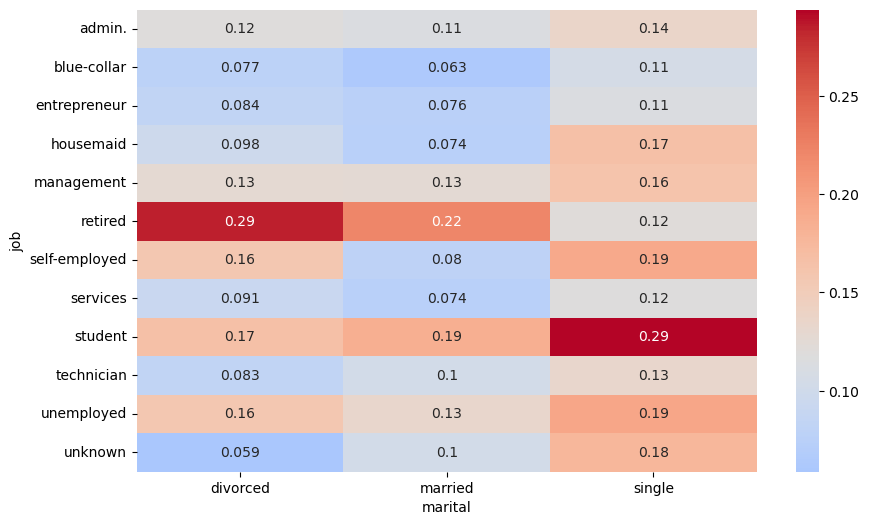

In [82]:
plt.figure(figsize=(10,6)) 
sns.heatmap(job_maritial,annot=True,cmap='coolwarm',center=bank['response_alert'].mean())

C:\Users\asus\AppData\Local\Temp\ipykernel_19956\2891686039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bank.corr()


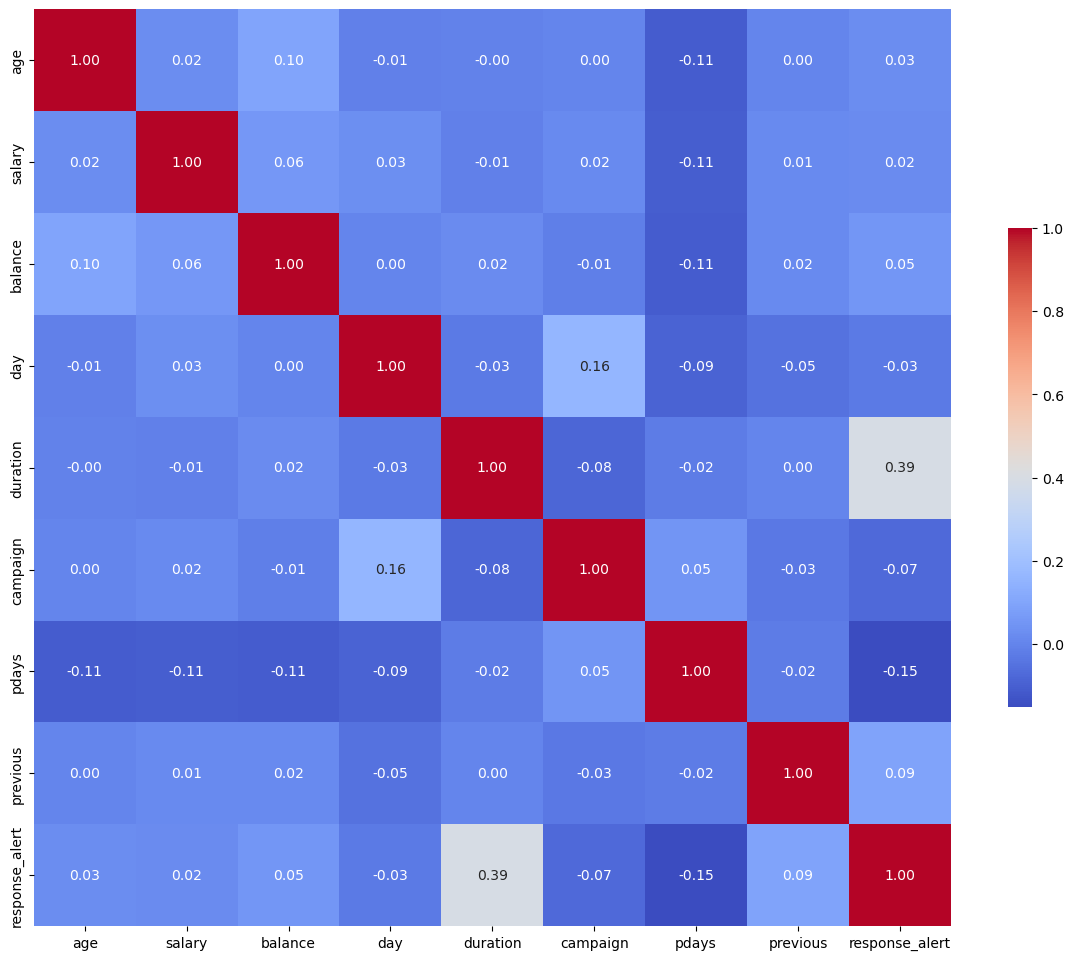

Highly correlated pairs (excluding self-correlations):

Series([], dtype: float64)


In [83]:
# Calculate the correlation matrix
correlation_matrix = bank.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.show()

# To highlight multicollinearity,focus on any pairs of variables with an absolute correlation coefficient greater than a threshold, for example, 0.8.
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
print("Highly correlated pairs (excluding self-correlations):\n")
print(highly_correlated_pairs[(highly_correlated_pairs > 0.8) & (highly_correlated_pairs < 1)])
